In [893]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [700]:
data = pd.read_csv(r"C:\Users\97798\Desktop\HRDataset_v14.csv")

In [701]:
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.00,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.00,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.00,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.00,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.00,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.00,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.00,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.00,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.00,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [702]:
X = data.drop('Salary', axis =1)

In [703]:
y = data.Salary

In [704]:
X

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,0,...,Michael Albert,22.00,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,1,...,Simon Roup,4.00,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,1,...,Kissy Sullivan,20.00,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,0,...,Elijiah Gray,16.00,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,1,...,Webster Butler,39.00,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,0,...,Kissy Sullivan,20.00,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,1,...,Brannon Miller,12.00,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,0,...,Janet King,2.00,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,0,...,Simon Roup,4.00,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [705]:
y

0       62506
1      104437
2       64955
3       64991
4       50825
        ...  
306     65893
307     48513
308    220450
309     89292
310     45046
Name: Salary, Length: 311, dtype: int64

In [706]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

In [707]:
X_train

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
206,"Oliver, Brooke",10078,1,1,0,5,5,3,0,1,...,Webster Butler,39.00,LinkedIn,Fully Meets,5.00,3,0,7/2/2013,0,17
272,"Sullivan, Timothy",10117,1,1,1,1,5,3,0,0,...,Michael Albert,22.00,Google Search,Fully Meets,4.36,5,0,1/24/2019,0,10
126,"Heitzman, Anthony",10129,0,0,1,1,5,3,0,0,...,Ketsia Liebig,19.00,Google Search,Fully Meets,4.17,4,0,2/11/2019,0,1
63,"Davis, Daniel",10143,0,0,1,1,5,3,0,0,...,Kissy Sullivan,20.00,LinkedIn,Fully Meets,3.96,4,0,2/27/2019,0,6
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,0,...,Elijiah Gray,16.00,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,"Estremera, Miguel",10280,0,0,1,4,5,2,0,1,...,Michael Albert,22.00,Google Search,Needs Improvement,5.00,4,0,4/12/2018,5,16
111,"Gonzalez, Cayo",10031,0,2,1,1,5,4,1,0,...,Brannon Miller,12.00,Diversity Job Fair,Exceeds,4.50,4,0,2/18/2019,0,1
15,"Bates, Norman",10061,0,0,1,4,5,3,0,1,...,Kelley Spirea,18.00,Google Search,Fully Meets,5.00,4,0,4/5/2017,0,20
26,"Boutwell, Bonalyn",10081,1,1,0,1,1,3,1,0,...,Brandon R. LeBlanc,3.00,Diversity Job Fair,Fully Meets,5.00,4,3,2/18/2019,0,4


In [709]:
X_train.drop('Employee_Name', axis =1, inplace = True)

In [710]:
X_train

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
206,10078,1,1,0,5,5,3,0,1,20,...,Webster Butler,39.00,LinkedIn,Fully Meets,5.00,3,0,7/2/2013,0,17
272,10117,1,1,1,1,5,3,0,0,19,...,Michael Albert,22.00,Google Search,Fully Meets,4.36,5,0,1/24/2019,0,10
126,10129,0,0,1,1,5,3,0,0,19,...,Ketsia Liebig,19.00,Google Search,Fully Meets,4.17,4,0,2/11/2019,0,1
63,10143,0,0,1,1,5,3,0,0,20,...,Kissy Sullivan,20.00,LinkedIn,Fully Meets,3.96,4,0,2/27/2019,0,6
3,10088,1,1,0,1,5,3,0,0,19,...,Elijiah Gray,16.00,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,10280,0,0,1,4,5,2,0,1,19,...,Michael Albert,22.00,Google Search,Needs Improvement,5.00,4,0,4/12/2018,5,16
111,10031,0,2,1,1,5,4,1,0,19,...,Brannon Miller,12.00,Diversity Job Fair,Exceeds,4.50,4,0,2/18/2019,0,1
15,10061,0,0,1,4,5,3,0,1,19,...,Kelley Spirea,18.00,Google Search,Fully Meets,5.00,4,0,4/5/2017,0,20
26,10081,1,1,0,1,1,3,1,0,26,...,Brandon R. LeBlanc,3.00,Diversity Job Fair,Fully Meets,5.00,4,3,2/18/2019,0,4


In [711]:
X_train.DOB

206    02/11/52
272    10/07/82
126    01/04/84
63     09/14/79
3      09/27/88
         ...   
84     09/02/83
111    09/29/69
15     10/18/81
26     04/04/87
224    10/15/84
Name: DOB, Length: 248, dtype: object

In [712]:
X_train.columns


Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [764]:
X_train.isna().sum()

EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLate

In [763]:
X_test.isna().sum()

EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLate

In [672]:
X_test.ManagerID=X_test.ManagerID.replace(np.nan, 15)

In [671]:
X_test.ManagerID.mean()

15.96774193548387

In [673]:
X_train.dtypes

EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName                    object
ManagerID                     float64
RecruitmentS

In [716]:
X_train.DOB

206    02/11/52
272    10/07/82
126    01/04/84
63     09/14/79
3      09/27/88
         ...   
84     09/02/83
111    09/29/69
15     10/18/81
26     04/04/87
224    10/15/84
Name: DOB, Length: 248, dtype: object

In [721]:
X_test.DOB = X_test.DOB.str.split('/').str.get(2)

In [722]:
X_test.DOB

306    85
78     73
216    86
80     91
187    81
       ..
155    69
278    65
218    77
124    52
125    74
Name: DOB, Length: 63, dtype: object

In [723]:
X_test['DOB'] = '19' + X_test['DOB'].astype(str)


In [724]:
X_test.DOB

306    1985
78     1973
216    1986
80     1991
187    1981
       ... 
155    1969
278    1965
218    1977
124    1952
125    1974
Name: DOB, Length: 63, dtype: object

In [727]:
X_test.drop('ManagerName', axis =1, inplace = True)

In [740]:
X_train.LastPerformanceReview_Date

206    2013
272    2019
126    2019
63     2019
3      2019
       ... 
84     2018
111    2019
15     2017
26     2019
224    2018
Name: LastPerformanceReview_Date, Length: 248, dtype: object

In [738]:
X_train.LastPerformanceReview_Date = X_train.LastPerformanceReview_Date.str.split('/').str.get(2)

In [743]:
X_train.columns

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [744]:
X_test.columns

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [761]:
X_train.dtypes

EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                      int32
DateofTermination               int32
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerID                     float64
RecruitmentSource              object
PerformanceS

In [762]:
X_test.dtypes

EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                      int32
DateofTermination               int32
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerID                     float64
RecruitmentSource              object
PerformanceS

In [765]:
num_features = X_train.select_dtypes(exclude='object')
cat_features = X_train.select_dtypes(include='object')

In [766]:
num_features

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,Zip,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
206,10078,1,1,0,5,5,3,0,1,20,2492,2012,2013,39.00,5.00,3,0,2013,0,17
272,10117,1,1,1,1,5,3,0,0,19,2747,2015,2016,22.00,4.36,5,0,2019,0,10
126,10129,0,0,1,1,5,3,0,0,19,2149,2012,2016,19.00,4.17,4,0,2019,0,1
63,10143,0,0,1,1,5,3,0,0,20,2458,2011,2016,20.00,3.96,4,0,2019,0,6
3,10088,1,1,0,1,5,3,0,0,19,1886,2008,2016,16.00,4.84,5,0,2019,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,10280,0,0,1,4,5,2,0,1,19,2129,2012,2018,22.00,5.00,4,0,2018,5,16
111,10031,0,2,1,1,5,4,1,0,19,2108,2011,2016,12.00,4.50,4,0,2019,0,1
15,10061,0,0,1,4,5,3,0,1,19,2050,2011,2017,18.00,5.00,4,0,2017,0,20
26,10081,1,1,0,1,1,3,1,0,26,2468,2015,2016,3.00,5.00,4,3,2019,0,4


In [767]:
cat_features

,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore
206,Production Technician II,MA,1952,F,Married,US Citizen,No,Asian,unhappy,Voluntarily Terminated,Production,LinkedIn,Fully Meets
272,Production Technician I,MA,1982,M,Married,US Citizen,Yes,White,N/A-StillEmployed,Active,Production,Google Search,Fully Meets
126,Production Technician I,MA,1984,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,Google Search,Fully Meets
63,Production Technician II,MA,1979,M,Single,Eligible NonCitizen,No,Two or more races,N/A-StillEmployed,Active,Production,LinkedIn,Fully Meets
3,Production Technician I,MA,1988,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Production,Indeed,Fully Meets
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Production Technician I,MA,1983,M,Single,US Citizen,No,White,attendance,Terminated for Cause,Production,Google Search,Needs Improvement
111,Production Technician I,MA,1969,M,Divorced,US Citizen,No,Black or African American,N/A-StillEmployed,Active,Production,Diversity Job Fair,Exceeds
15,Production Technician I,MA,1981,M,Single,US Citizen,No,White,attendance,Terminated for Cause,Production,Google Search,Fully Meets
26,Sr. Accountant,MA,1987,F,Married,US Citizen,No,Black or African American,N/A-StillEmployed,Active,Admin Offices,Diversity Job Fair,Fully Meets


In [768]:
X_train.shape

(248, 33)

In [770]:
corr_features = correlation(num_features, 0.85)

In [771]:
corr_features

{'LastPerformanceReview_Date', 'Termd'}

In [774]:
X_test.drop(corr_features, axis =1, inplace = True)

In [912]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1
                                               )), num_features.columns)
    ],
    remainder='passthrough'
)


In [913]:
step1

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 Index(['Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus',
       'Department', 'RecruitmentSource', 'PerformanceScore'],
      dtype='object')),
                                ('num_tnf', MinMaxScaler(),
                                 Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'PositionID', 'Zip',
       'DateofHire', 'DateofTermination', 'ManagerID', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30',
       'Absences'],
      dtype='object'))])

In [1063]:
step3= HistGradientBoostingRegressor(           
 
    l2_regularization=0.04717400971547439,
    learning_rate=0.056803570475111864,
    max_leaf_nodes=97,
    min_samples_leaf=17,
    max_iter=234
            )


# {'lr__l2_regularization': 0.0014918418768132158,
#  'lr__learning_rate': 0.0627792280226098,
#  'lr__max_iter': 142,
#  'lr__max_leaf_nodes': 74,
#  'lr__min_samples_leaf': 34}

# step3 = DecisionTreeRegressor()

In [1064]:
step2=PCA(n_components=2
         )
pipe = Pipeline([
    ('Transform', step1),
#     ('pca', step2),
    ('lr', step3)
])

In [1065]:
pipe.fit(X_train, y_train)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus',
       'Department', 'RecruitmentSource', 'PerformanceScore'],
      dtype='obj...
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'PositionID', 'Zip',
       'DateofHire', 'DateofTermination', 'ManagerID', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30',
       'Absences'],
      dtype='object'))])),
                ('lr',
                 HistGradientBoostingRegressor(l2_regularization=0.04717400971547439,
                                               learning_rate=0.056803570475111864,
                                               max_iter=234, max_leaf_nodes=97,
                                               min_samples_leaf=17))])

In [1066]:
y_train.isna().sum()

0

In [1067]:
y_pred = pipe.predict(X_test)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 6, 7, 8, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [1068]:
y_test
y_pred

array([ 61683.51068541,  69824.9593916 ,  47796.63822042,  53102.45094227,
        72093.00945893,  62331.35550883,  52640.1441912 ,  62582.13758372,
        54279.55005073,  60957.56568225,  65220.05494215,  56797.70225857,
        58702.05495666,  78179.51826183,  59568.46803818,  64262.17804451,
        50684.48398793,  49651.61260299,  95040.18874322,  67618.99858383,
        47884.00676521,  72872.16710919,  91040.39495608,  69263.73860238,
        55234.16873705,  65211.65766772,  55463.24728884,  53268.8802691 ,
        66057.50986393,  95129.08003916,  74352.1570212 ,  97945.90827434,
        60695.40106318,  57097.09150321, 124388.65383361,  89739.55136683,
        66332.90986049,  67468.17719519, 100281.50799805,  64629.32515131,
        63393.15833815, 113783.79542655,  64472.6116639 ,  63548.88551213,
        68277.53137169,  54913.02260154,  63326.88103275,  61775.10304236,
        54983.24149278,  55320.96924501,  55357.1306599 ,  60445.10054779,
        65801.09872786,  

In [1069]:
diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})

In [1070]:
diff

,Actual,Predicted
306,65893,61683.51
78,75188,69824.96
216,45998,47796.64
80,60070,53102.45
187,83667,72093.01
...,...,...
155,71339,66341.26
278,58370,61543.50
218,74669,78032.80
124,52177,51075.17


<Axes: >

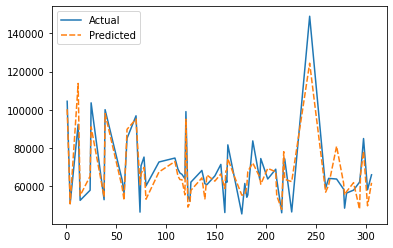

In [1071]:
sns.lineplot(data=diff)

In [1072]:
r2_score(y_test, y_pred)

0.7884411023884719

In [1073]:
mean_absolute_error(y_test,y_pred)

6279.745821028833

In [910]:
param_grid = {
    'lr__learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'lr__max_iter': [100, 200, 500],  # Maximum number of boosting iterations
    'lr__max_leaf_nodes': [31, 50, 100],  # Maximum number of leaf nodes
    'lr__min_samples_leaf': [10, 20, 30],  # Minimum number of samples required at leaf nodes
    'lr__l2_regularization': [0.0, 0.1, 0.01],  # L2 regularization parameter
}


In [1016]:


from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'lr__learning_rate': uniform(0.001, 0.1),  # Learning rate
    'lr__max_iter': randint(100, 1000),  # Maximum number of boosting iterations
    'lr__max_leaf_nodes': randint(10, 100),  # Maximum number of leaf nodes
    'lr__min_samples_leaf': randint(10, 50),  # Minimum number of samples required at leaf nodes
    'lr__l2_regularization': uniform(0.0, 0.1),  # L2 regularization parameter
}


random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)




C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Transform',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('col_tnf',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               Index(['Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus',
       'Department', 'RecruitmentSour...
                                        'lr__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DDA8965190>,
                                        'lr__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDA8A3C8B0>,
                                        'lr__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDA897D460>,
                                        'lr__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDA8A3C130>})

<Axes: xlabel='Actual', ylabel='Predicted'>

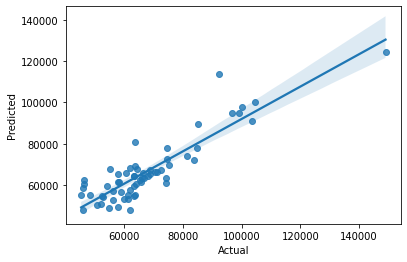

In [1074]:
sns.regplot(data= diff, x ='Actual',y = 'Predicted')

In [1020]:
random_search.best_params_

{'lr__l2_regularization': 0.0014918418768132158,
 'lr__learning_rate': 0.0627792280226098,
 'lr__max_iter': 142,
 'lr__max_leaf_nodes': 74,
 'lr__min_samples_leaf': 34}

In [1075]:
random_search.best_score_

0.3602903690255078